## Modelisation
A partir de maintenant nous souhaitons estimer le prix d'un bien à partir de ces caractéristiques.

In [83]:
import numpy as np
import pandas as pd

df = pd.read_csv('preprocessing_2.csv')

#Ajout du prix au m² que l'on devra prédire
#Nous choisissons cette variable et non le prix car le prix est énormement dépendant de la surface et le modèle concentrerait trop sur cette relation
df['prix_surface'] = df['prix'] / df['surface']
df=df.drop(columns=['prix'])

df

,id,Type,Nb_piece,loc,surface,loc1,loc2,loc3,loc1_x,loc1_y,loc2_x,loc2_y,loc3_x,loc3_y,prix_surface
0,apimo-85473173,Appartement,1,75001 Paris 1er (Châtelet - Les Halles),29,Châtelet - Les Halles,Quartier Les Halles,75001,48.861651,2.347013,48.862373,2.345313,48.864614,2.334396,12551.724138
1,hektor-Les-4-Quartiers-383,Appartement,1,75001 Paris 1er (Châtelet - Les Halles),23,Châtelet - Les Halles,Quartier Les Halles,75001,48.861651,2.347013,48.862373,2.345313,48.864614,2.334396,13086.956522
2,hektor-PARISLUXURYHOMES-4007,Appartement,5,75002 Paris 2e (Palais Royal),106,Palais Royal,Quartier du Palais Royal,75001,48.863585,2.336204,48.864603,2.336049,48.864614,2.334396,23490.566038
3,ag754594-448898324,Studio,1,75001 Paris 1er (Saint-Germain - L'Auxerrois),27,Saint-Germain,NaN,75006,48.856553,2.333331,NaN,NaN,48.850433,2.332951,13518.518519
4,keller-williams-1-34_1_53-180645,Appartement,2,75001 Paris 1er (Vendôme),67,Vendôme,Quartier Vendôme,75001,48.866900,2.328549,48.866900,2.328549,48.864614,2.334396,17761.194030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10096,apimo-83966258,Appartement,1,75020 Paris 20e (Père Lachaise - Réunion),22,Père Lachaise,Quartier du Père-Lachaise,75020,48.861130,2.394009,48.863752,2.395302,48.865042,2.398929,10863.636364
10097,ag755800-412953689,Appartement,1,75020 Paris 20e (Père Lachaise - Réunion),35,Père Lachaise,Quartier du Père-Lachaise,75020,48.861130,2.394009,48.863752,2.395302,48.865042,2.398929,6845.714286
10098,century-21-202_480_27885,Appartement,3,75020 Paris 20e (Plaine - Lagny),63,Plaine,Quartier de Charonne,75020,48.850152,2.402190,48.855145,2.397638,48.865042,2.398929,8555.555556
10099,netty-company34605jrw-appt-3212,Appartement,1,75020 Paris 20e (Gambetta),27,Gambetta,Quartier du Père-Lachaise,75020,48.864933,2.398054,48.863752,2.395302,48.865042,2.398929,7962.962963


In [84]:
df['loc2_x'] = df['loc2_x'].fillna(df['loc1_x'])
df['loc2_y'] = df['loc2_y'].fillna(df['loc1_y'])
df['loc2']= df['loc2'].fillna(df['loc1'])

In [85]:
# Garder ce qui nous intéresse
# On suprimme l'id car inutile pour estimer le prix
df = df.drop(columns=['id'])
# On suprimme supprime les localisations  dans un premier temps car je suppose l'information inclus dans les coordonnées
df = df.drop(columns=["loc","loc1","loc2","loc3"])
df

,Type,Nb_piece,surface,loc1_x,loc1_y,loc2_x,loc2_y,loc3_x,loc3_y,prix_surface
0,Appartement,1,29,48.861651,2.347013,48.862373,2.345313,48.864614,2.334396,12551.724138
1,Appartement,1,23,48.861651,2.347013,48.862373,2.345313,48.864614,2.334396,13086.956522
2,Appartement,5,106,48.863585,2.336204,48.864603,2.336049,48.864614,2.334396,23490.566038
3,Studio,1,27,48.856553,2.333331,48.856553,2.333331,48.850433,2.332951,13518.518519
4,Appartement,2,67,48.866900,2.328549,48.866900,2.328549,48.864614,2.334396,17761.194030
...,...,...,...,...,...,...,...,...,...,...
10096,Appartement,1,22,48.861130,2.394009,48.863752,2.395302,48.865042,2.398929,10863.636364
10097,Appartement,1,35,48.861130,2.394009,48.863752,2.395302,48.865042,2.398929,6845.714286
10098,Appartement,3,63,48.850152,2.402190,48.855145,2.397638,48.865042,2.398929,8555.555556
10099,Appartement,1,27,48.864933,2.398054,48.863752,2.395302,48.865042,2.398929,7962.962963


In [86]:
#Encod the sting variables
# One hot encoding seems better for variables with a few values taken and now cardinality

df_encoded = pd.get_dummies(df, columns=['Type'], prefix='Type',dtype=float)
df_encoded

,Nb_piece,surface,loc1_x,loc1_y,loc2_x,loc2_y,loc3_x,loc3_y,prix_surface,Type_Appartement,Type_Duplex,Type_Loft/atelier/surface,Type_Maison,Type_Studio
0,1,29,48.861651,2.347013,48.862373,2.345313,48.864614,2.334396,12551.724138,1.0,0.0,0.0,0.0,0.0
1,1,23,48.861651,2.347013,48.862373,2.345313,48.864614,2.334396,13086.956522,1.0,0.0,0.0,0.0,0.0
2,5,106,48.863585,2.336204,48.864603,2.336049,48.864614,2.334396,23490.566038,1.0,0.0,0.0,0.0,0.0
3,1,27,48.856553,2.333331,48.856553,2.333331,48.850433,2.332951,13518.518519,0.0,0.0,0.0,0.0,1.0
4,2,67,48.866900,2.328549,48.866900,2.328549,48.864614,2.334396,17761.194030,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10096,1,22,48.861130,2.394009,48.863752,2.395302,48.865042,2.398929,10863.636364,1.0,0.0,0.0,0.0,0.0
10097,1,35,48.861130,2.394009,48.863752,2.395302,48.865042,2.398929,6845.714286,1.0,0.0,0.0,0.0,0.0
10098,3,63,48.850152,2.402190,48.855145,2.397638,48.865042,2.398929,8555.555556,1.0,0.0,0.0,0.0,0.0
10099,1,27,48.864933,2.398054,48.863752,2.395302,48.865042,2.398929,7962.962963,1.0,0.0,0.0,0.0,0.0


In [87]:
# Let's normalize the variable so to reduce the impact of the scale of the input features of the model (SVM for now)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Binary variables don't need to be normalized
numerical_cols = ["Nb_piece", "surface", "prix_surface", "loc1_x", "loc1_y", "loc2_x", "loc2_y", "loc3_x", "loc3_y"]

df_standardized = df_encoded.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_standardized

,Nb_piece,surface,loc1_x,loc1_y,loc2_x,loc2_y,loc3_x,loc3_y,prix_surface,Type_Appartement,Type_Duplex,Type_Loft/atelier/surface,Type_Maison,Type_Studio
0,-1.153637,-0.732827,-0.006817,0.174517,0.003106,0.047514,0.090786,-0.151324,0.419686,1.0,0.0,0.0,0.0,0.0
1,-1.153637,-0.855554,-0.006817,0.174517,0.003106,0.047514,0.090786,-0.151324,0.568379,1.0,0.0,0.0,0.0,0.0
2,1.436757,0.842166,0.085344,-0.100796,0.105431,-0.167508,0.090786,-0.151324,3.458620,1.0,0.0,0.0,0.0,0.0
3,-1.153637,-0.773736,-0.249863,-0.173978,-0.263889,-0.230595,-0.606137,-0.188304,0.688272,0.0,0.0,0.0,0.0,1.0
4,-0.506038,0.044443,0.243379,-0.295787,0.210786,-0.341595,0.090786,-0.151324,1.866935,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10096,-1.153637,-0.876008,-0.031683,1.371566,0.066381,1.207818,0.111800,1.499825,-0.049284,1.0,0.0,0.0,0.0,0.0
10097,-1.153637,-0.610100,-0.031683,1.371566,0.066381,1.207818,0.111800,1.499825,-1.165508,1.0,0.0,0.0,0.0,0.0
10098,0.141560,-0.037375,-0.554983,1.579961,-0.328453,1.262021,0.111800,1.499825,-0.690495,1.0,0.0,0.0,0.0,0.0
10099,-1.153637,-0.773736,0.149600,1.474608,0.066381,1.207818,0.111800,1.499825,-0.855124,1.0,0.0,0.0,0.0,0.0


In [88]:
from sklearn.model_selection import cross_val_score, KFold

# Séparation des inputs et outputs
X = df_standardized.drop(columns=["prix_surface"])
y = df_standardized["prix_surface"]

# Validation croisée avec 10 folds pour réduire l'aléatoire du splitting
kf = KFold(n_splits=10, shuffle=True)

#Au cas ou, nous créons une partition
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Testons différents models

In [89]:
#Imports for metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Création des métrics
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

In [90]:
#Linear regression
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()

# Calcul des scores
mae_scores = cross_val_score(modelLR, X, y, scoring=mae_scorer, cv=kf)
mse_scores = cross_val_score(modelLR, X, y, scoring=mse_scorer, cv=kf)
r2_scores = cross_val_score(modelLR, X, y, scoring=r2_scorer, cv=kf)

# Résultats moyens
print("MAE moyen :", -np.mean(mae_scores)) #Use of - du to greater_is_better=False
print("MSE moyen :", -np.mean(mse_scores)) #Use of - du to greater_is_better=False
print("R² moyen :", np.mean(r2_scores))
print("Écart-type R² :", np.std(r2_scores))

MAE moyen : 0.6384153889179383
MSE moyen : 0.9030447551363837
R² moyen : 0.09201755835563671
Écart-type R² : 0.031663686075915895


In [91]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

modelRFR = RandomForestRegressor()

# Calcul des scores
mae_scores = cross_val_score(modelRFR, X, y, scoring=mae_scorer, cv=kf)
mse_scores = cross_val_score(modelRFR, X, y, scoring=mse_scorer, cv=kf)
r2_scores = cross_val_score(modelRFR, X, y, scoring=r2_scorer, cv=kf)

# Résultats moyens
print("MAE moyen :", -np.mean(mae_scores)) #Use of - du to greater_is_better=False
print("MSE moyen :", -np.mean(mse_scores)) #Use of - du to greater_is_better=False
print("R² moyen :", np.mean(r2_scores))
print("Écart-type R² :", np.std(r2_scores))

MAE moyen : 0.43572071531862555
MSE moyen : 0.508868222229575
R² moyen : 0.5068644846634534
Écart-type R² : 0.04585972473568582


In [92]:
#SVM
from sklearn.svm import SVR

modelSVR = SVR()

# Calcul des scores
mae_scores = cross_val_score(modelSVR, X, y, scoring=mae_scorer, cv=kf)
mse_scores = cross_val_score(modelSVR, X, y, scoring=mse_scorer, cv=kf)
r2_scores = cross_val_score(modelSVR, X, y, scoring=r2_scorer, cv=kf)

# Résultats moyens
print("MAE moyen :", -np.mean(mae_scores)) #Use of - du to greater_is_better=False
print("MSE moyen :", -np.mean(mse_scores)) #Use of - du to greater_is_better=False
print("R² moyen :", np.mean(r2_scores))
print("Écart-type R² :", np.std(r2_scores))

MAE moyen : 0.48594887909663703
MSE moyen : 0.676422717963291
R² moyen : 0.32267448553156164
Écart-type R² : 0.033860143094886136


In [ ]:
!pip install xgboost

In [93]:
#Puisque l'arbre semble le plus prométeur, testons une verion boostée
from xgboost import XGBRegressor

modelXGB = XGBRegressor(
    n_estimators=100,      # Nombre d'arbres
    learning_rate=0.1,     # Taux d'apprentissage
    max_depth=5,           # Profondeur maximale des arbres
)

# Calcul des scores
mae_scores = cross_val_score(modelXGB, X, y, scoring=mae_scorer, cv=kf)
mse_scores = cross_val_score(modelXGB, X, y, scoring=mse_scorer, cv=kf)
r2_scores = cross_val_score(modelXGB, X, y, scoring=r2_scorer, cv=kf)

# Résultats moyens
print("MAE moyen :", -np.mean(mae_scores)) #Use of - du to greater_is_better=False
print("MSE moyen :", -np.mean(mse_scores)) #Use of - du to greater_is_better=False
print("R² moyen :", np.mean(r2_scores))
print("Écart-type R² :", np.std(r2_scores))

MAE moyen : 0.4476416829780689
MSE moyen : 0.49897294343663934
R² moyen : 0.503734636014521
Écart-type R² : 0.047600934618560145


In [99]:
#Ce n'est pas mieux que l'arbre classique donc essayons d'optimiser les paramêtres
from sklearn.model_selection import RandomizedSearchCV

# Définir une grille de paramêtres
param_dist = {
    'n_estimators': np.linspace(50, 500, 10).astype(int),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': [6,7,8,9,10,11,12],
}

#Model de recherche de paramêtres
grid_search  = RandomizedSearchCV(
    estimator=modelXGB,
    param_distributions=param_dist,
    n_iter=50,                          # Nombre d'itérations
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

grid_search .fit(X, y)

best_params = grid_search .best_params_
final_model = XGBRegressor(**best_params)

# Calcul des scores
mae_scores = cross_val_score(final_model, X, y, scoring=mae_scorer, cv=kf)
mse_scores = cross_val_score(final_model, X, y, scoring=mse_scorer, cv=kf)
r2_scores = cross_val_score(final_model, X, y, scoring=r2_scorer, cv=kf)

# Résultats moyens
print("MAE moyen :", -np.mean(mae_scores)) #Use of - du to greater_is_better=False
print("MSE moyen :", -np.mean(mse_scores)) #Use of - du to greater_is_better=False
print("R² moyen :", np.mean(r2_scores))
print("Écart-type R² :", np.std(r2_scores))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
MAE moyen : 0.44010541810079173
MSE moyen : 0.48309672206394616
R² moyen : 0.5125424705679166
Écart-type R² : 0.05165866822025048


In [100]:
best_params

{'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.052222222222222225}

Etrangement, le XGboost n'est pas meilleur que l'arbre classique.
Je n'ai surement pas réussi à trouver le meilleur paramêtre durant mes divers essais.
Les résultats sont plutôt mauvais puisque l'on travail sur des valeurs normalisées, 0.48594887909663703 de MAE est élévé

### Visualisation

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
best_model.fit(X_train,y_train)
y_predict=best_model.predict(X_test)

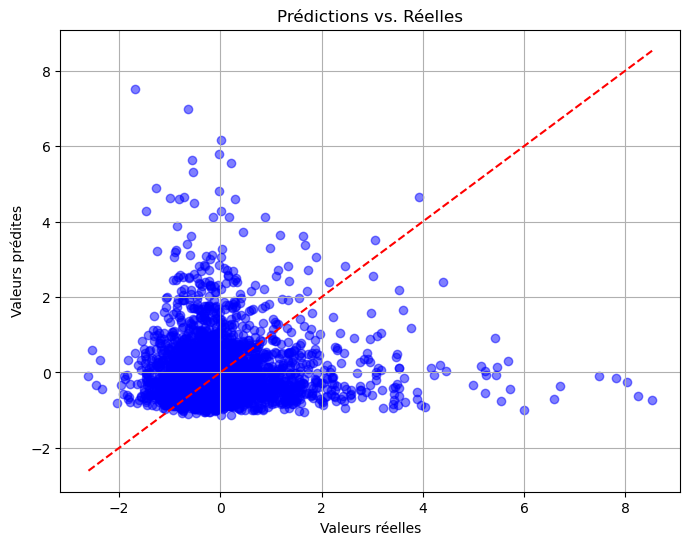

In [119]:
import matplotlib.pyplot as plt

# Graphique de Prédictions vs. Réelles (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ligne y=x
plt.title("Prédictions vs. Réelles")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.grid(True)
plt.show()

C'est assez catastrophique. Les predictions ne sont pas alignées avec les valeurs réelles. De plus les valurs extreme sont toujours mals prédites.

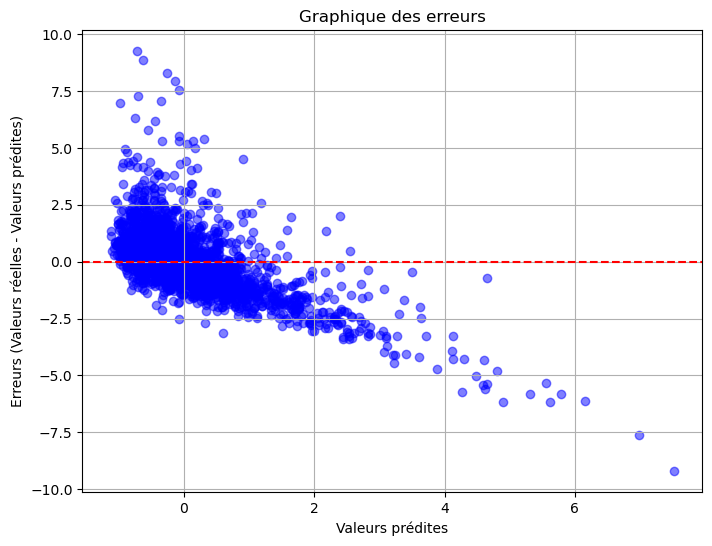

In [120]:
# Calcul des erreurs
errors = y_test - y_pred

# Graphique des erreurs
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, errors, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Ligne des erreurs nulles
plt.title("Graphique des erreurs")
plt.xlabel("Valeurs prédites")
plt.ylabel("Erreurs (Valeurs réelles - Valeurs prédites)")
plt.grid(True)
plt.show()

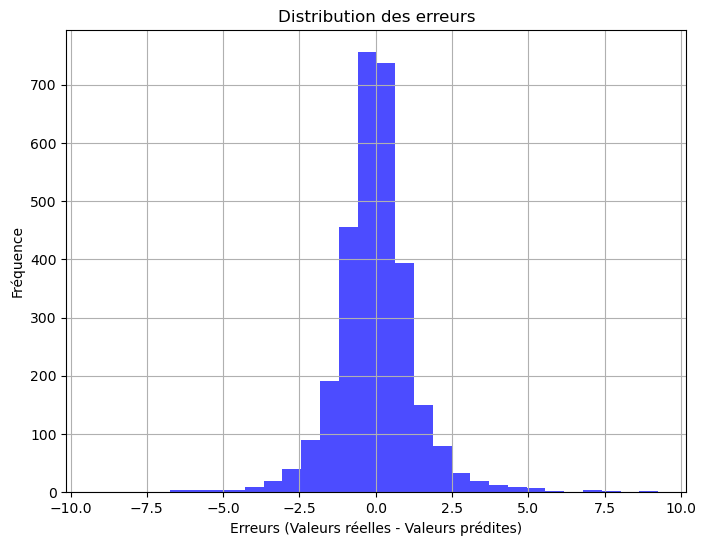

In [121]:
# Histogramme des erreurs
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, color='blue', alpha=0.7)
plt.title("Distribution des erreurs")
plt.xlabel("Erreurs (Valeurs réelles - Valeurs prédites)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

L'erreur reste gaussienne centrée donc il n'y a pas de biais

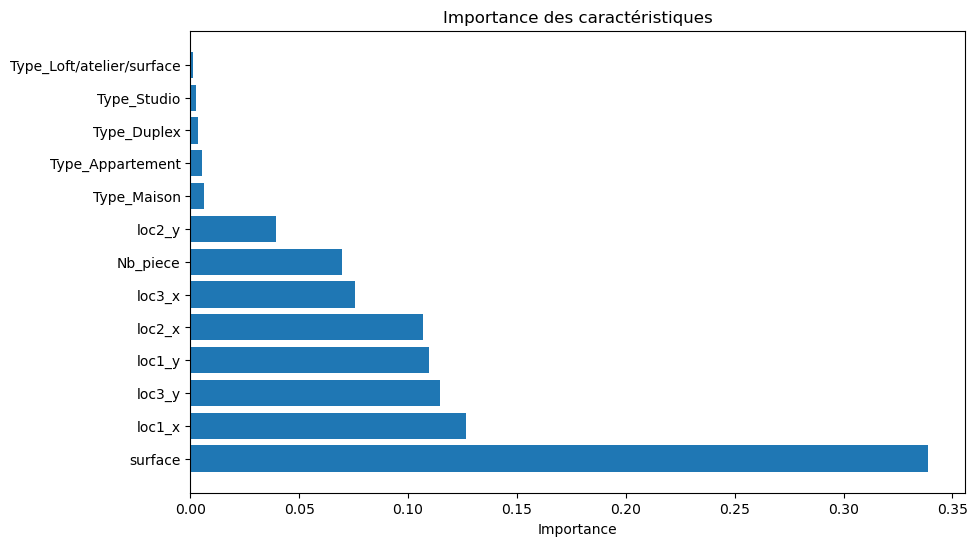

In [122]:
# Importance des caractéristiques pour Random Forest
importances = modelRFR.feature_importances_

# Trier les importances
indices = np.argsort(importances)[::-1]

# Visualisation
plt.figure(figsize=(10, 6))
plt.title("Importance des caractéristiques")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Importance")
plt.show()

La surface reste la caractéristique prépondérante malgrès le fait que l'on essaye de prédire le prix/m²
Cependant elle accapare une moins grande part de la prédiction que si l'on esye de prédire jutste le prix

Dans le cas ou l'on veut prédire le prix, le meilleur modèle était le Random Forest

In [104]:
df_prix = pd.read_csv('preprocessing_2.csv')
df_prix['loc2_x'] = df_prix['loc2_x'].fillna(df_prix['loc1_x'])
df_prix['loc2_y'] = df_prix['loc2_y'].fillna(df_prix['loc1_y'])
df_prix['loc2']= df_prix['loc2'].fillna(df_prix['loc1'])
df_prix = df_prix.drop(columns=['id'])
df_prix = df_prix.drop(columns=["loc","loc1","loc2","loc3"])
df_encoded_prix = pd.get_dummies(df_prix, columns=['Type'], prefix='Type',dtype=float)
scaler_prix = StandardScaler()
numerical_cols = ["Nb_piece", "surface", "prix", "loc1_x", "loc1_y", "loc2_x", "loc2_y", "loc3_x", "loc3_y"]
df_standardized_prix = df_encoded_prix.copy()
df_standardized_prix[numerical_cols] = scaler_prix.fit_transform(df_encoded_prix[numerical_cols])

# Séparation des inputs et outputs
X_prix = df_standardized_prix.drop(columns=["prix"])
y_prix = df_standardized_prix["prix"]
X_train, X_test, y_train, y_test = train_test_split(X_prix, y_prix, test_size=0.3)


best_model=modelRFR

In [106]:
# Calcul des scores
mae_scores = cross_val_score(best_model, X_prix, y_prix, scoring=mae_scorer, cv=kf)
mse_scores = cross_val_score(best_model,  X_prix, y_prix, scoring=mse_scorer, cv=kf)
r2_scores = cross_val_score(best_model,  X_prix, y_prix, scoring=r2_scorer, cv=kf)

# Résultats moyens
print("MAE moyen :", -np.mean(mae_scores)) #Use of - du to greater_is_better=False
print("MSE moyen :", -np.mean(mse_scores)) #Use of - du to greater_is_better=False
print("R² moyen :", np.mean(r2_scores))
print("Écart-type R² :", np.std(r2_scores))

MAE moyen : 0.15096783577402675
MSE moyen : 0.20279057320473023
R² moyen : 0.8335612887537478
Écart-type R² : 0.02875093110772447


In [108]:
best_model.fit(X_train,y_train)
y_predict=best_model.predict(X_test)

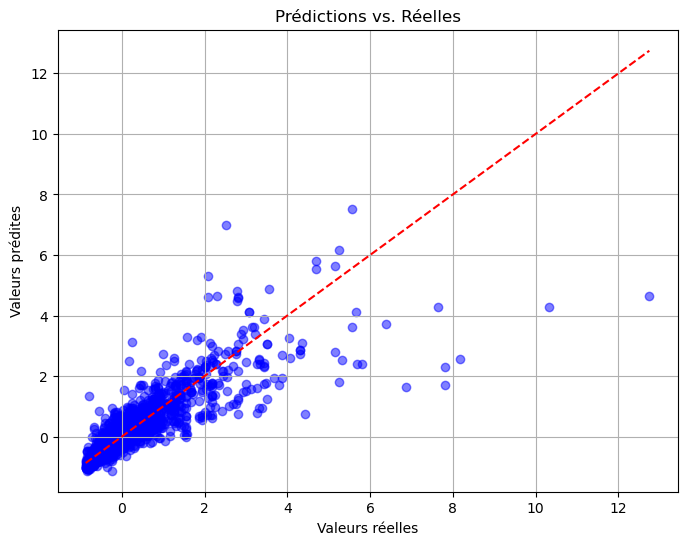

In [109]:
import matplotlib.pyplot as plt

# Graphique de Prédictions vs. Réelles (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ligne y=x
plt.title("Prédictions vs. Réelles")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.grid(True)
plt.show()

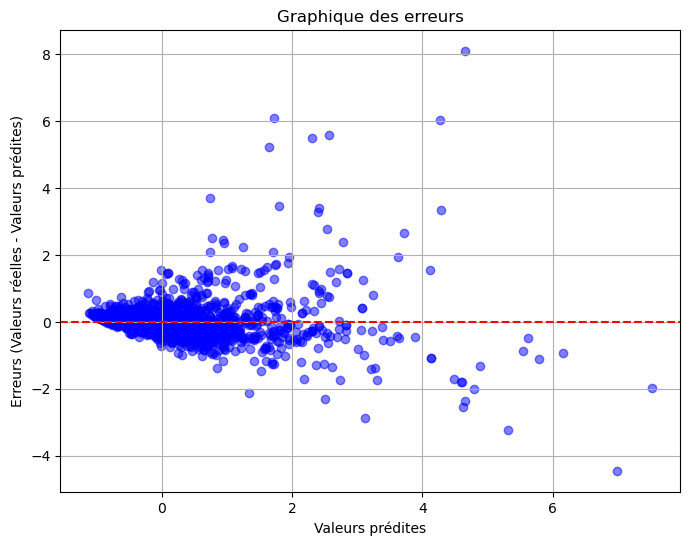

In [110]:
# Calcul des erreurs
errors = y_test - y_pred

# Graphique des erreurs
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, errors, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Ligne des erreurs nulles
plt.title("Graphique des erreurs")
plt.xlabel("Valeurs prédites")
plt.ylabel("Erreurs (Valeurs réelles - Valeurs prédites)")
plt.grid(True)
plt.show()

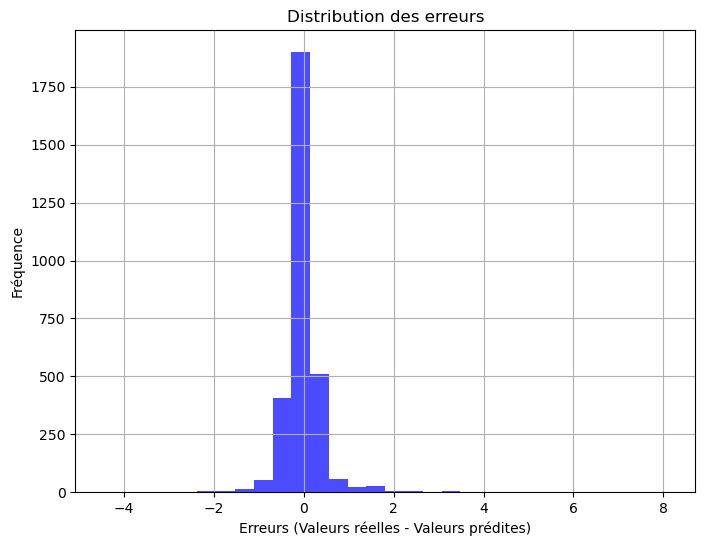

In [111]:
# Histogramme des erreurs
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, color='blue', alpha=0.7)
plt.title("Distribution des erreurs")
plt.xlabel("Erreurs (Valeurs réelles - Valeurs prédites)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

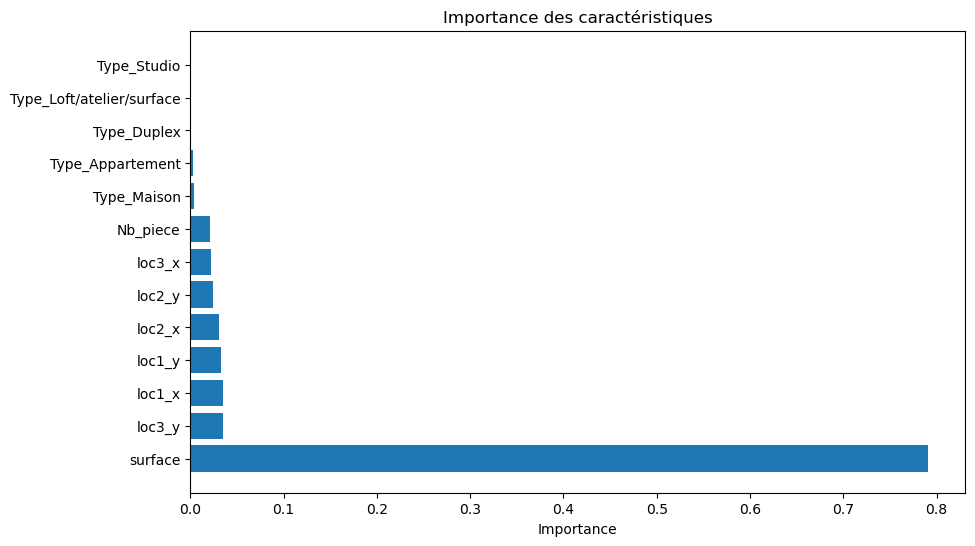

In [112]:
# Importance des caractéristiques pour Random Forest
importances = modelRFR.feature_importances_

# Trier les importances
indices = np.argsort(importances)[::-1]

# Visualisation
plt.figure(figsize=(10, 6))
plt.title("Importance des caractéristiques")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Importance")
plt.show()